# 05 - Plot UTSW and Rockefeller Together

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tweety= pd.read_csv('tweety_seg_updated_UMAP_v_measures.csv')
tweety['segmentation_method'] = 'TweetyNet'
hand = pd.read_csv('hand_seg_updated_UMAP_v_measures.csv')
hand['segmentation_method'] = 'By Hand'
wseg = pd.read_csv('umap_new_params_wseg_v_measures.csv')
wseg['segmentation_method'] = 'WhisperSeg'

In [3]:
all_v_measures = pd.concat([tweety, wseg, hand])

In [4]:
all_v_measures = all_v_measures[all_v_measures.Bird_ID != 'S389']

In [5]:
tweety= pd.read_csv('tweety_seg_updated_UMAP_v_measures_rock.csv')
tweety['segmentation_method'] = 'TweetyNet'
hand = pd.read_csv('hand_seg_updated_UMAP_v_measures_rock.csv')
hand['segmentation_method'] = 'By Hand'
wseg = pd.read_csv('umap_new_params_wseg_v_measures_rock.csv')
wseg['segmentation_method'] = 'WhisperSeg'
all_v_measures_rock= pd.concat([tweety, wseg, hand])

In [6]:
all_v_measures_rock['Colony'] = 'Rockefeller'
all_v_measures['Colony'] = 'UTSW'
all_v_measures = pd.concat([all_v_measures, all_v_measures_rock])

In [7]:
all_v_measures.head(2)

,Unnamed: 0,v_measure,homogeneity,completeness,Bird_ID,ref_db,win_length,hop_length,n_fft,K_nn,min_cluster_prop,embedding_method,embedding_dimensions,min_level_db,segmentation_method,Colony
0,0,0.676886,0.763669,0.607813,B145,20,512,128,512,10,0.04,UMAP,2,-28,TweetyNet,UTSW
1,0,0.478078,0.502015,0.456319,B236,20,512,128,512,10,0.04,UMAP,2,-28,TweetyNet,UTSW


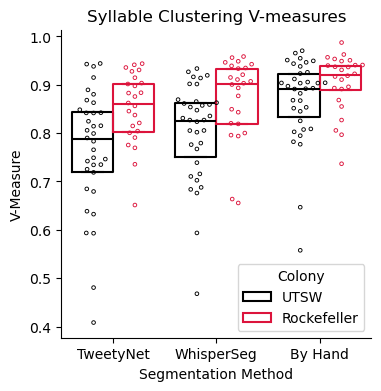

In [14]:
plt.figure(figsize = (4, 4))
sns.swarmplot(data = all_v_measures, x = 'segmentation_method', y = 'v_measure', hue = 'Colony', s = 5, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_v_measures, x = 'segmentation_method', y = 'v_measure', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Clustering V-measures")
plt.ylabel('V-Measure')
plt.xlabel('Segmentation Method')
sns.despine()
plt.savefig('utsw_rock_v_measures.svg')

In [10]:
plt.rcParams.update({'font.size': 18})

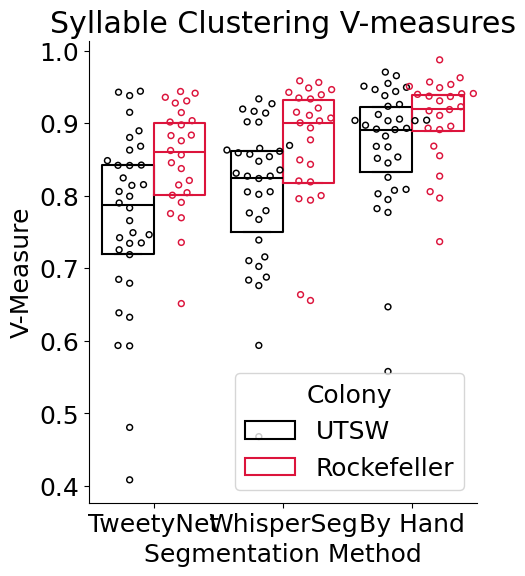

In [17]:
plt.figure(figsize = (5, 6))
sns.swarmplot(data = all_v_measures, x = 'segmentation_method', y = 'v_measure', hue = 'Colony', s = 8, marker = "$\circ$",
             dodge = True, legend = False, palette = ['black', 'crimson'])
sns.boxplot(data = all_v_measures, x = 'segmentation_method', y = 'v_measure', fill = False, hue = 'Colony', fliersize=0, whis = 0, 
            palette = ['black', 'crimson'])
plt.title("Syllable Clustering V-measures")
plt.ylabel('V-Measure')
plt.xlabel('Segmentation Method')
sns.despine()
plt.savefig('poster_utsw_rock_v_measures.svg')